---
<a name = Section3></a>
# **Question**
---

ABC Private Limited, a retail company, wants to gain insight into its customers' purchasing habits, particularly their spending on different product categories. To do this, they have provided a summary of the purchase history of a number of high-volume products from the previous month. This data includes information on the customer demographics, such as age, gender, marital status, city type, and length of stay in their current city, as well as details on the products themselves, including product ID and product category.




---
<a name = Section3></a>
# **Installing & Importing Libraries**
---

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                  # Importing pyplot interface using matplotlib
from scipy import stats                                          # Importing pyplot interface using matplotlib
import seaborn as sns                                            # Importin seaborm library for interactive visualization
import pandas as pd
import numpy as np
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **Data Acquisition & Description**
---
- User_ID: Unique identifier of shopper.
- Product_ID: Unique identifier of product. (No key given)
- Gender: Sex of shopper.
- Age: Age of shopper split into bins.
- Occupation: Occupation of shopper. (No key given)
- City_Category: Residence location of shopper. (No key given)
- Stay_In_Current_City_Years: Number of years stay in current city.
- Marital_Status: Marital status of shopper.
- Product_Category_1: Product category of purchase.
- Product_Category_2: Product may belong to other category.
- Product_Category_3: Product may belong to other category.
- Purchase: Purchase amount in dollars.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 550068 | 12 | Original Data - 187.8 MB|


In [ ]:
#importing dataset
dataset = pd.read_csv('/content/drive/MyDrive/PaperPedia/train.csv')
df_train = pd.DataFrame(dataset)
print('Data Shape:', df_train.shape)
df_train.head()

Data Shape: (550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969




---
<a name = Section4></a>
# **Check descriptive statistics of the dataset**
---

In [ ]:
df_train.info(verbose=True, memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 187.8 MB


In [ ]:
describe_stats = df_train.describe(include='all').T
describe_stats['median'] = df_train.median()
describe_stats

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,median
User_ID,550068.0,NaN,NaN,NaN,1003028.842401,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0,1003077.0
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068.0,NaN,NaN,NaN,8.076707,6.52266,0.0,2.0,7.0,14.0,20.0,7.0
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068.0,NaN,NaN,NaN,0.409653,0.49177,0.0,0.0,0.0,1.0,1.0,0.0
Product_Category_1,550068.0,NaN,NaN,NaN,5.40427,3.936211,1.0,1.0,5.0,8.0,20.0,5.0
Product_Category_2,376430.0,NaN,NaN,NaN,9.842329,5.08659,2.0,5.0,9.0,15.0,18.0,9.0


---
<a name = Section51> </a>
# **Handling of Missing Data**
---
- In this section, we will identify missing data and check the proportion of it and take appropriate measures.

In [ ]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1,
                         keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Product_Category_3,383247,69.672659
Product_Category_2,173638,31.566643
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000


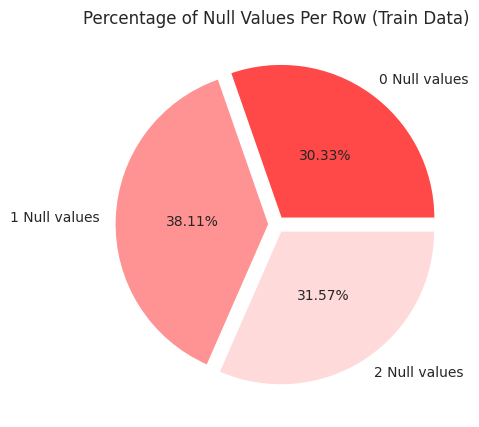

In [ ]:
df_train["null_count"] = df_train.isnull().sum(axis=1)
counts = df_train.groupby("null_count")["null_count"].count().to_dict()
pie, ax = plt.subplots(figsize=[5, 5])
colors = sns.color_palette("bwr_r")[0:5]
null_data = {"{} Null values".format(k) : v for k, v in counts.items() if k < 6}
plt.pie(x=null_data.values(), autopct="%.2f%%", explode=[0.05]*len(null_data.keys()), \
        labels=null_data.keys(), pctdistance=0.5, colors=colors)
_ = plt.title("Percentage of Null Values Per Row (Train Data)", fontsize=12)
plt.show()

---
<a name = Section4></a>
# **Check for unique values in the data**
---

In [ ]:
for column in df_train.columns:
    unique_values = df_train[column].nunique()
    print(f"Column '{column}' has {unique_values} unique value(s).")

Column 'User_ID' has 5891 unique value(s).
Column 'Product_ID' has 3631 unique value(s).
Column 'Gender' has 2 unique value(s).
Column 'Age' has 7 unique value(s).
Column 'Occupation' has 21 unique value(s).
Column 'City_Category' has 3 unique value(s).
Column 'Stay_In_Current_City_Years' has 5 unique value(s).
Column 'Marital_Status' has 2 unique value(s).
Column 'Product_Category_1' has 20 unique value(s).
Column 'Product_Category_2' has 17 unique value(s).
Column 'Product_Category_3' has 15 unique value(s).
Column 'Purchase' has 18105 unique value(s).
Column 'null_count' has 3 unique value(s).


---
<a name = Section4></a>
# **Check for duplicate values in the data - no duplicate vlaues**
---

In [ ]:
df_train.shape
duplicate_rows_df = df_train[df_train.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 13)


---
<a name = Section4></a>
# **Check for categorical features in the data**
---

In [ ]:
cat_features = []

for i in df_train.columns:
      if df_train[i].dtype == 'object':
        cat_features.append(i)
print(cat_features)

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


---
<a name = Section4></a>
# **Purchase Distribution with respect to other variables in the dataset**
---

In [ ]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'null_count'],
      dtype='object')

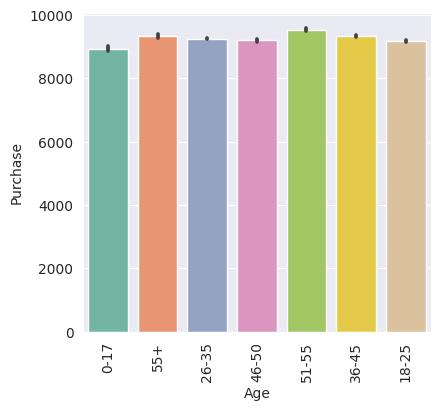

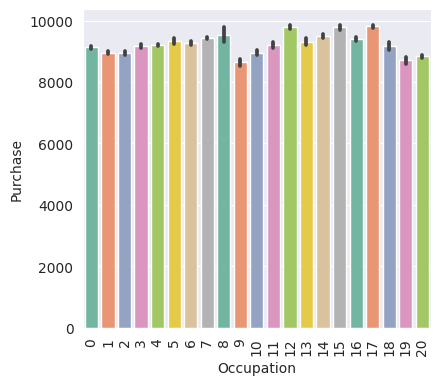

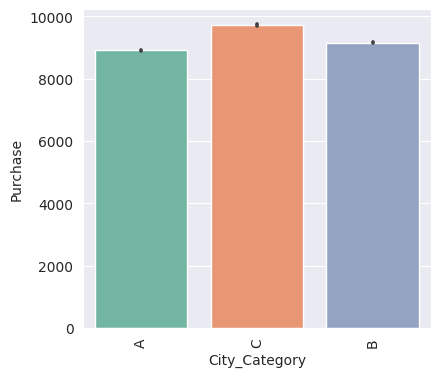

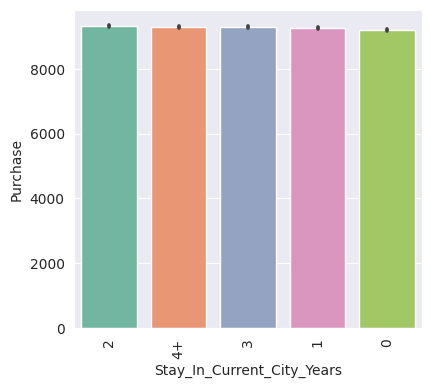

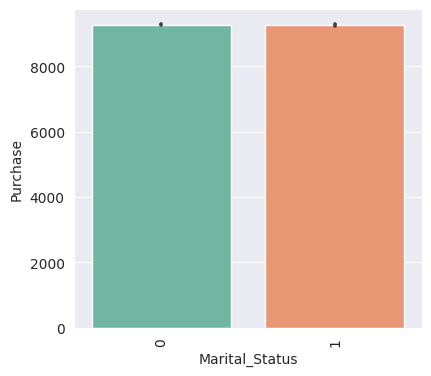

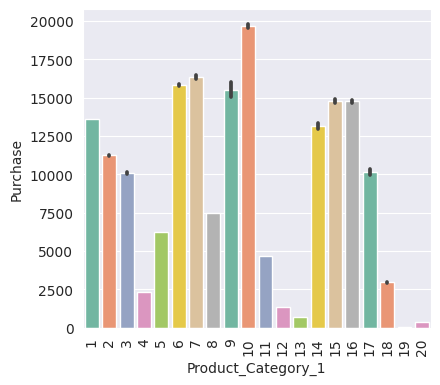

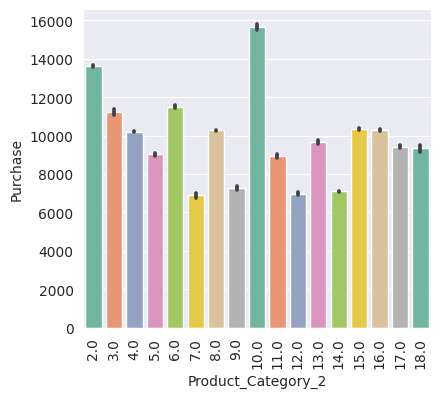

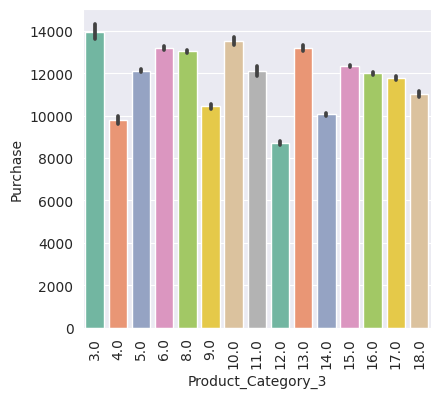

In [ ]:
cols=['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']
for i in range(1,len(cols)):
    fig=plt.figure(figsize=(26,24))
    fig.add_subplot(5,5,i)
    sns.barplot(data=df_train,x=cols[i],y=df_train['Purchase'],palette='Set2')
    plt.xticks(rotation=90)

---
<a name = Section4></a>
# **Analysis by Gender, Marital Status, occupation**
---

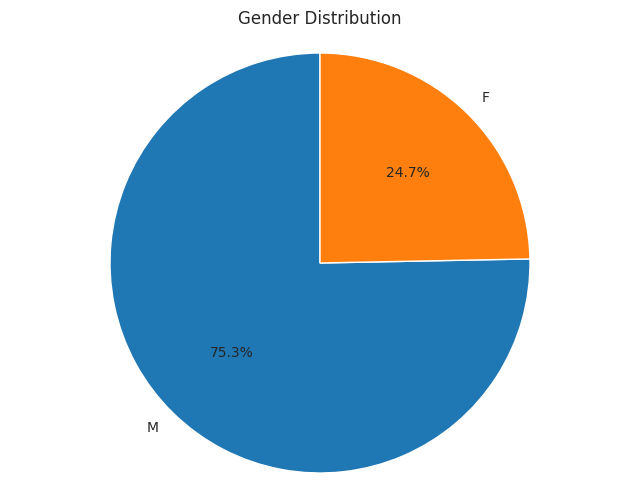

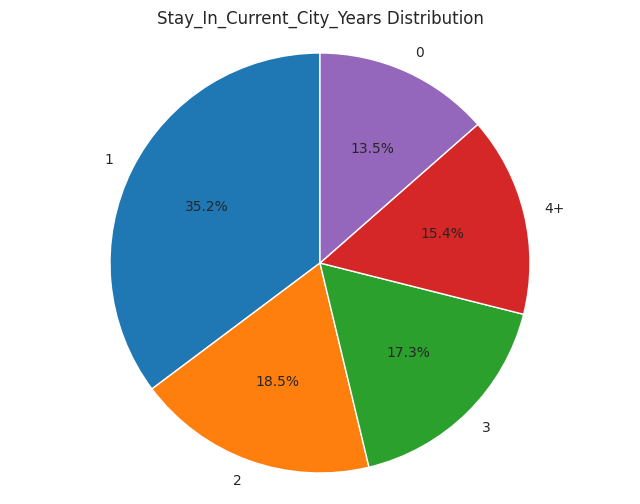

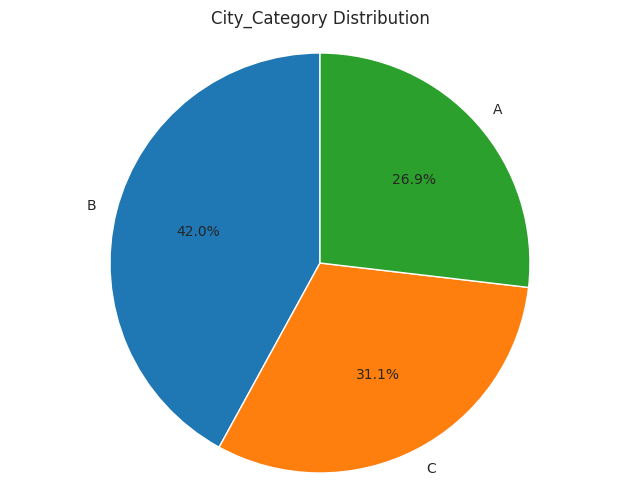

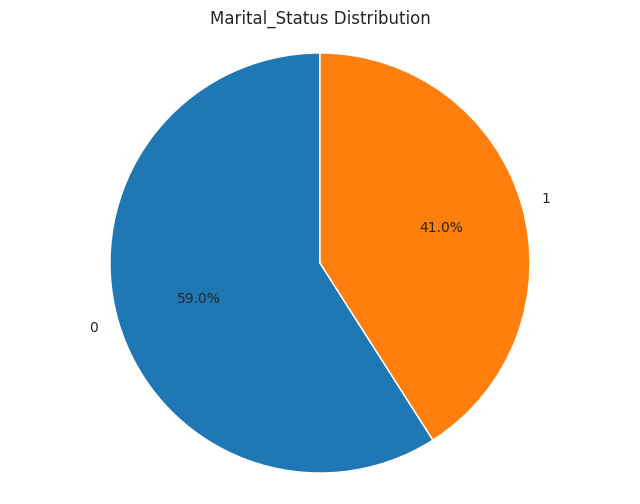

In [ ]:
columns_to_plot = ['Gender', 'Stay_In_Current_City_Years', 'City_Category', "Marital_Status"]

for column in columns_to_plot:

    column_counts = df_train[column].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(f"{column} Distribution")
    plt.show()

---
<a name = Section4></a>
# **Analysis by Age, Gender, Marital Status, occupation and Product**
---

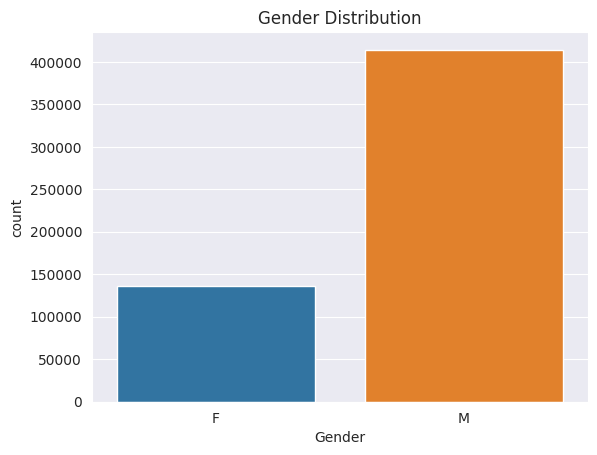

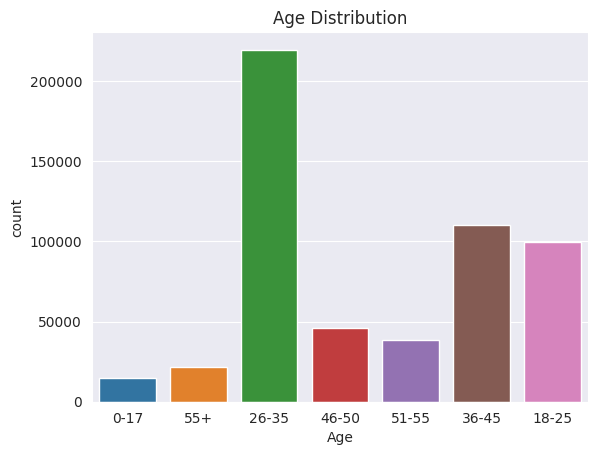

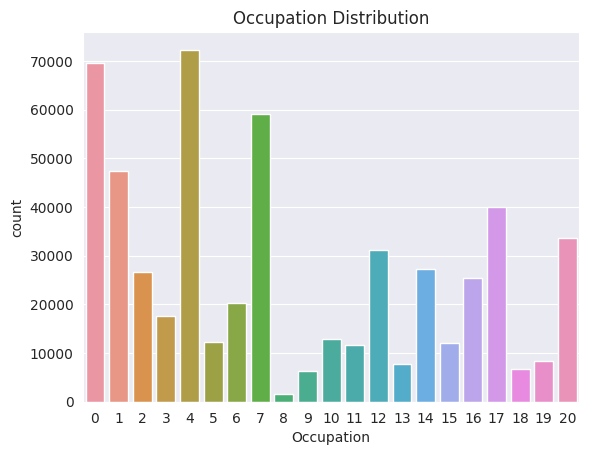

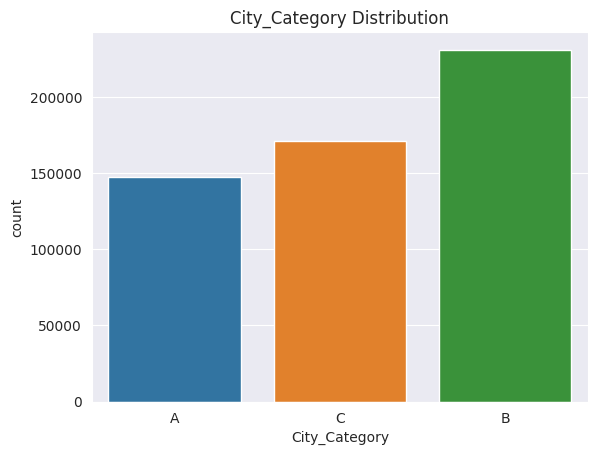

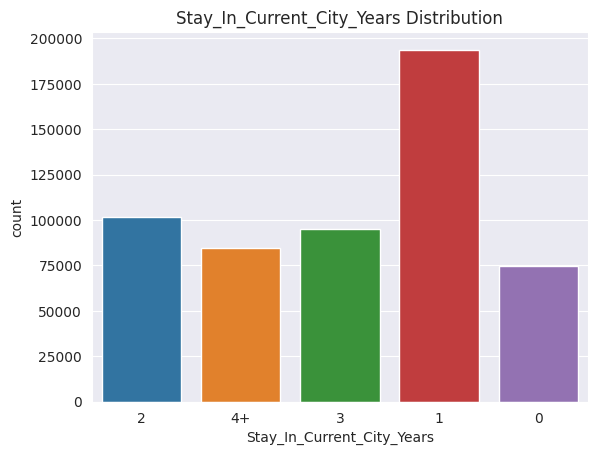

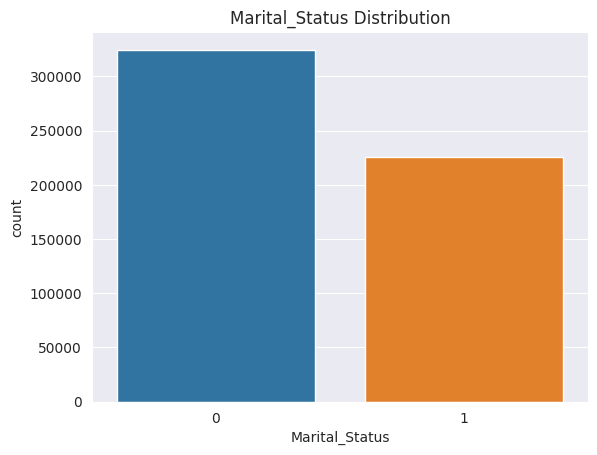

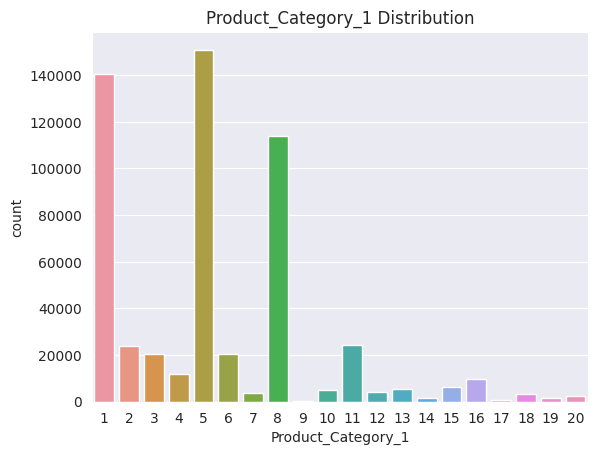

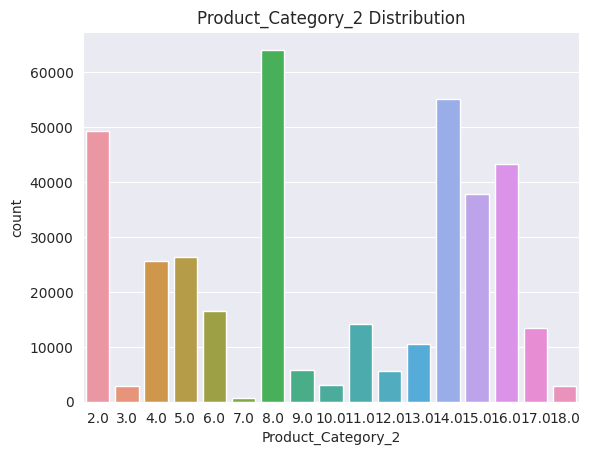

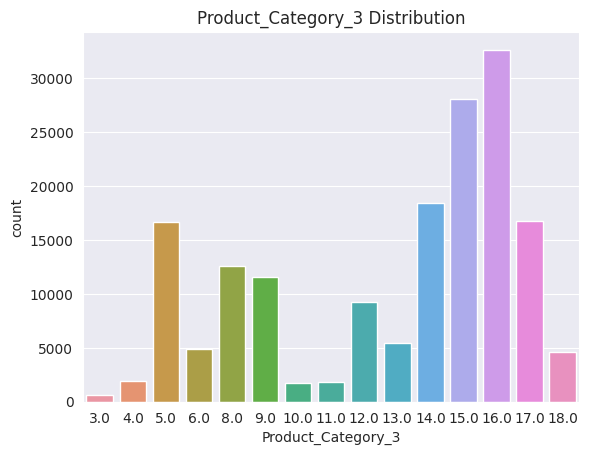

In [ ]:
columns_to_plot = ['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']
for i, column in enumerate(columns_to_plot):

    plt.figure(i)
    sns.countplot(x=column, data=df_train)
    plt.title(f"{column} Distribution")
plt.show()

---
<a name = Section4></a>
# **Purchase by Age Group and Gender**
---

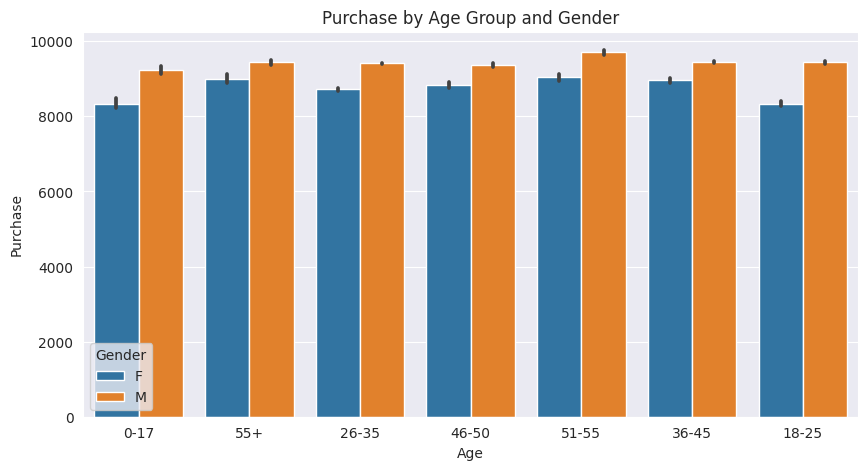

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_train, x=df_train['Age'], y=df_train['Purchase'], hue=df_train['Gender'])
plt.title("Purchase by Age Group and Gender")
plt.show()

---
<a name = Section4></a>
# **Purchase by City Category and Gender**
---

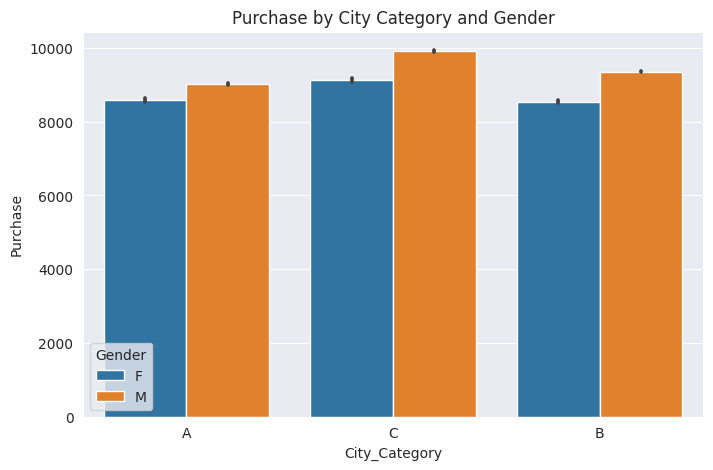

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_train, x=df_train['City_Category'], y=df_train['Purchase'], hue=df_train['Gender'])
plt.title("Purchase by City Category and Gender")
plt.show()

---
<a name = Section4></a>
# **Purchase by Occupation and Marital Status**
---

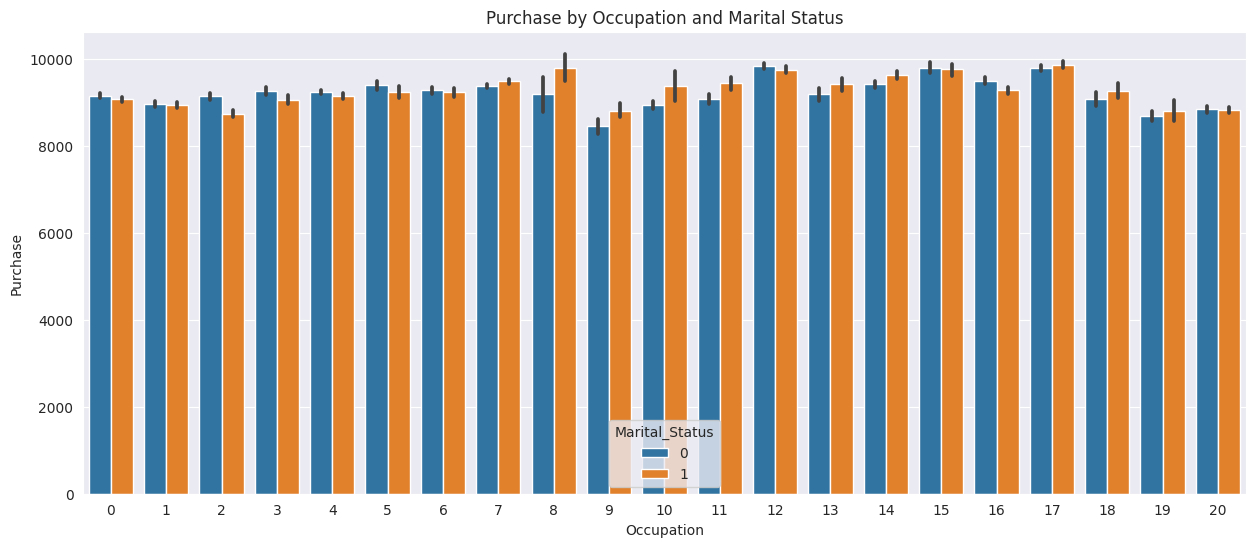

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df_train, x=df_train['Occupation'], y=df_train['Purchase'], hue=df_train['Marital_Status'].astype(str))
plt.title("Purchase by Occupation and Marital Status")
plt.show()

---
<a name = Section4></a>
# **Purchase by Stay Duration in City and Age Groups**
---

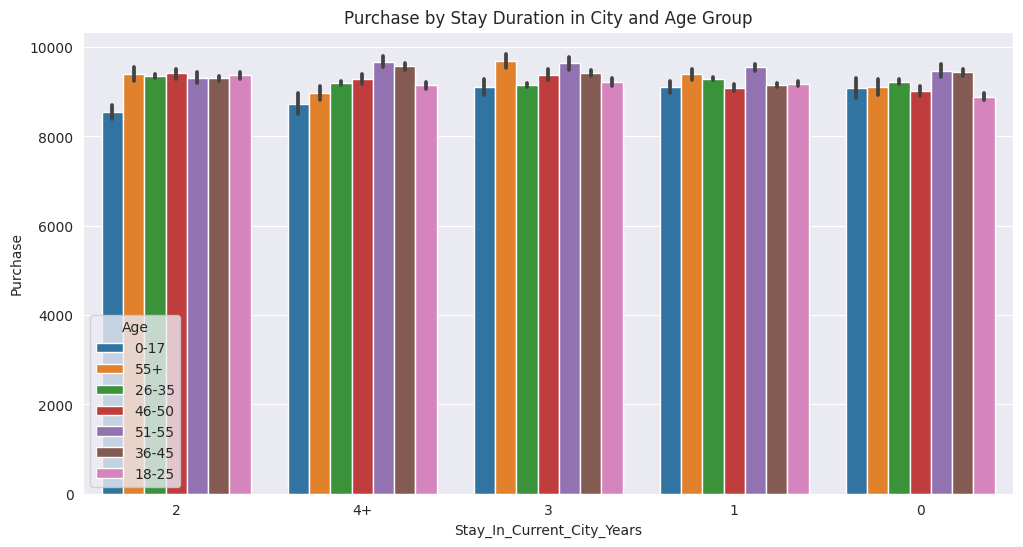

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_train, x=df_train['Stay_In_Current_City_Years'], y=df_train['Purchase'], hue=df_train['Age'])
plt.title("Purchase by Stay Duration in City and Age Group")
plt.show()

---
<a name = Section4></a>
# **Purchase by Product Category 1 and Gender**
---

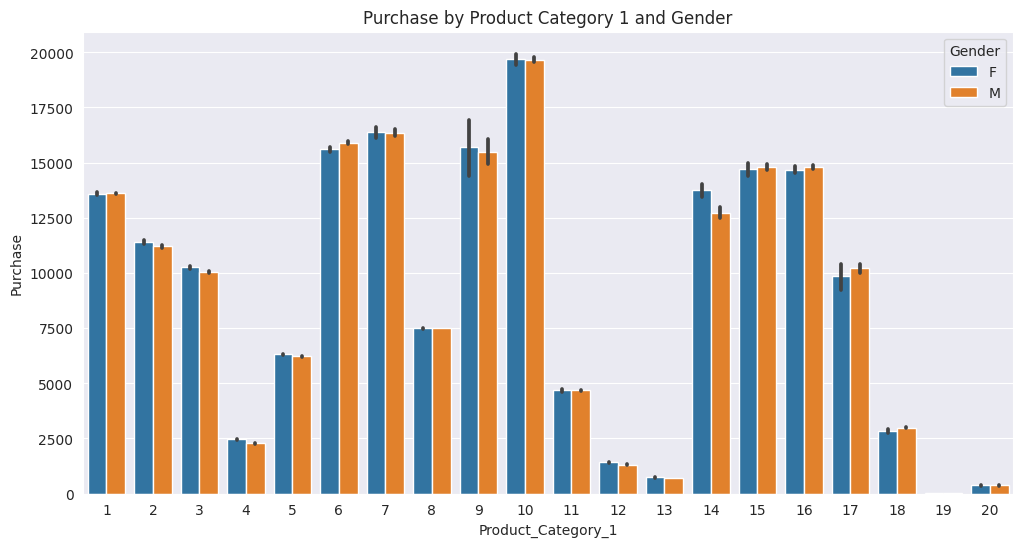

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_train, x=df_train['Product_Category_1'], y=df_train['Purchase'], hue=df_train['Gender'])
plt.title("Purchase by Product Category 1 and Gender")
plt.show()

---
<a name = Section4></a>
# **Purchase by City Category and Age Group**
---

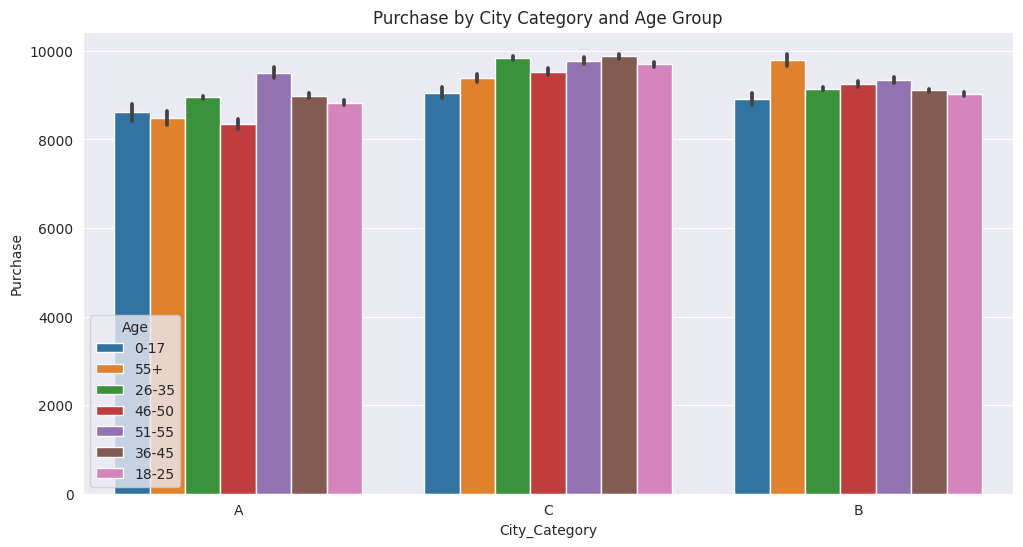

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_train, x=df_train['City_Category'], y=df_train['Purchase'], hue=df_train['Age'])
plt.title("Purchase by City Category and Age Group")
plt.show()

In [ ]:
def Plot_1(feature):

    fig,axes = plt.subplots(2,2,figsize=(15,12))
    fig.suptitle('Analysis of Purchase with ' + feature)
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    sns.set_style('darkgrid')


    for i in df_train[feature].unique():

        sns.distplot(a=df_train.loc[df_train[feature]==i]['Purchase'],ax = axes[0][0],label=i, kde=False)

        sns.kdeplot(data=df_train.loc[df_train[feature]==i]['Purchase'],ax = axes[0][1],label=i)


    axes[0][0].set_title('Histogram')
    axes[0][1].set_title('KDE plot')

    temp_df = df_train.groupby([feature]).sum().reset_index().sort_values('Purchase',ascending=False)
    colors = sns.color_palette('pastel')
    axes[1][0].pie(temp_df['Purchase'], labels = temp_df[feature], colors = colors, autopct='%.0f%%')
    axes[1][0].set_title('Percentage of Purchases by ' + feature)

    sns.boxplot(y=df_train['Purchase'],x=df_train[feature],ax=axes[1][1])
    axes[1][1].set_title('Box plot of Purchase by '+  feature)

    plt.legend()

---
<a name = Section4></a>
# **Purchase with City**
---

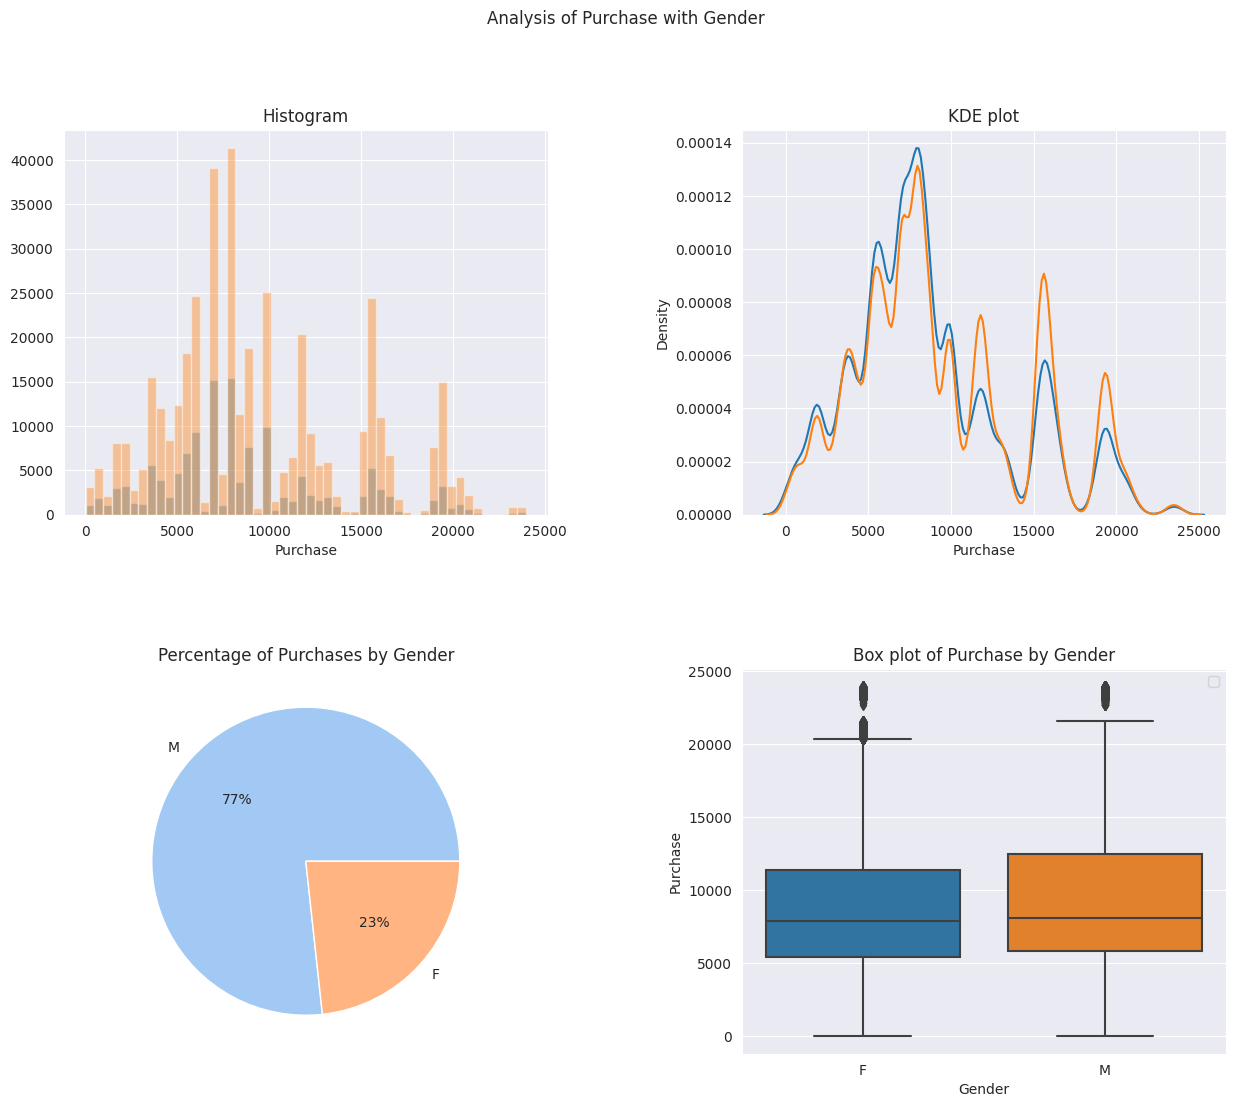

In [ ]:
Plot_1('Gender')

---
<a name = Section4></a>
# **Purchase with Marital_Status**
---

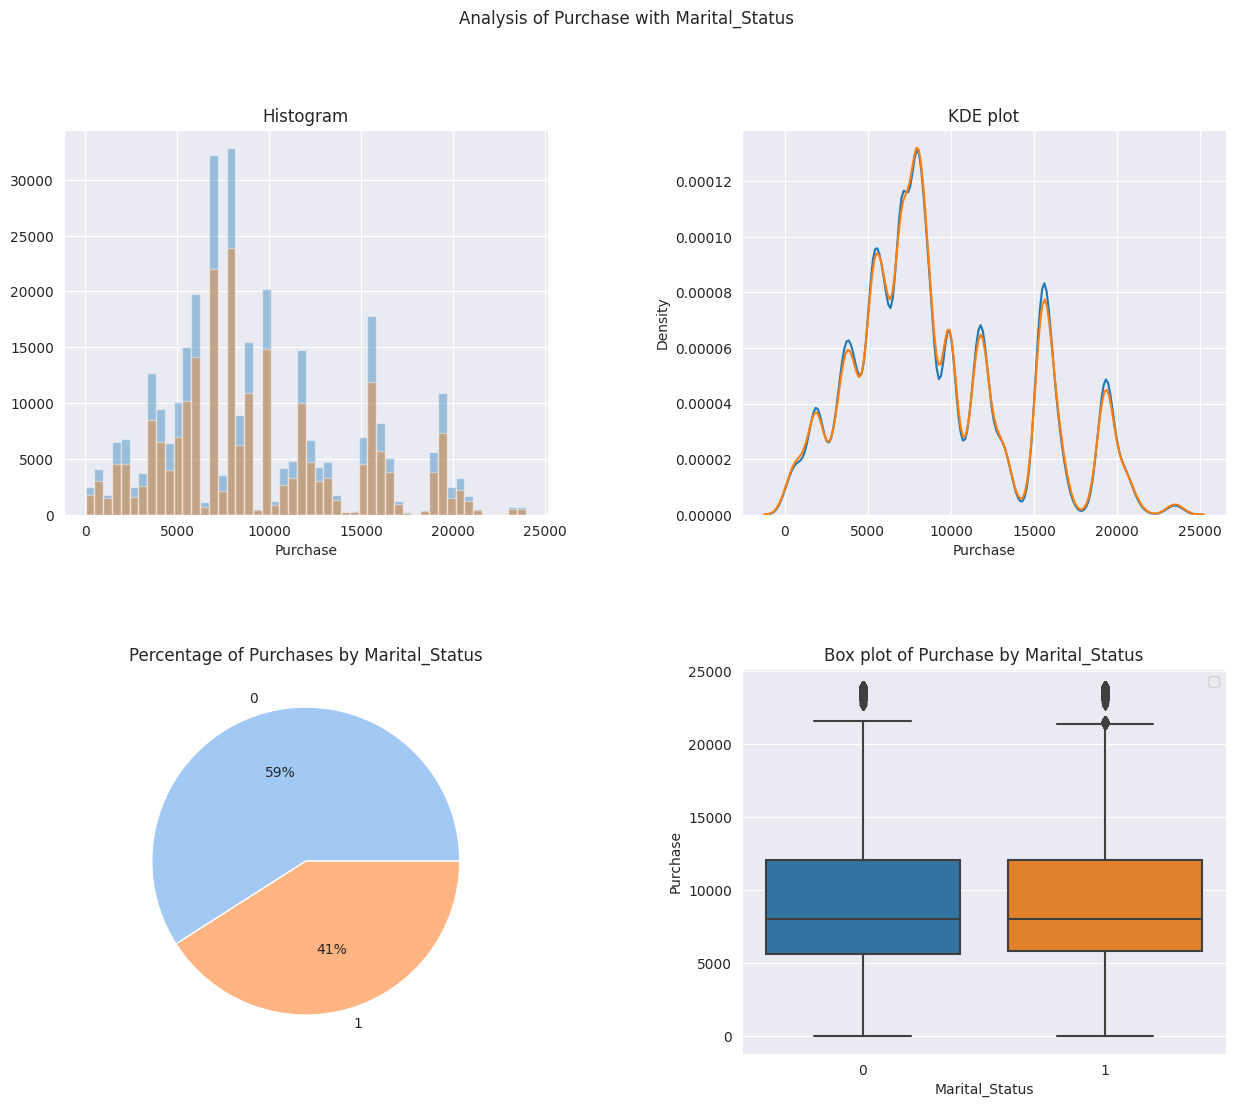

In [ ]:
Plot_1('Marital_Status')

---
<a name = Section4></a>
# **Purchase with City_Category**
---

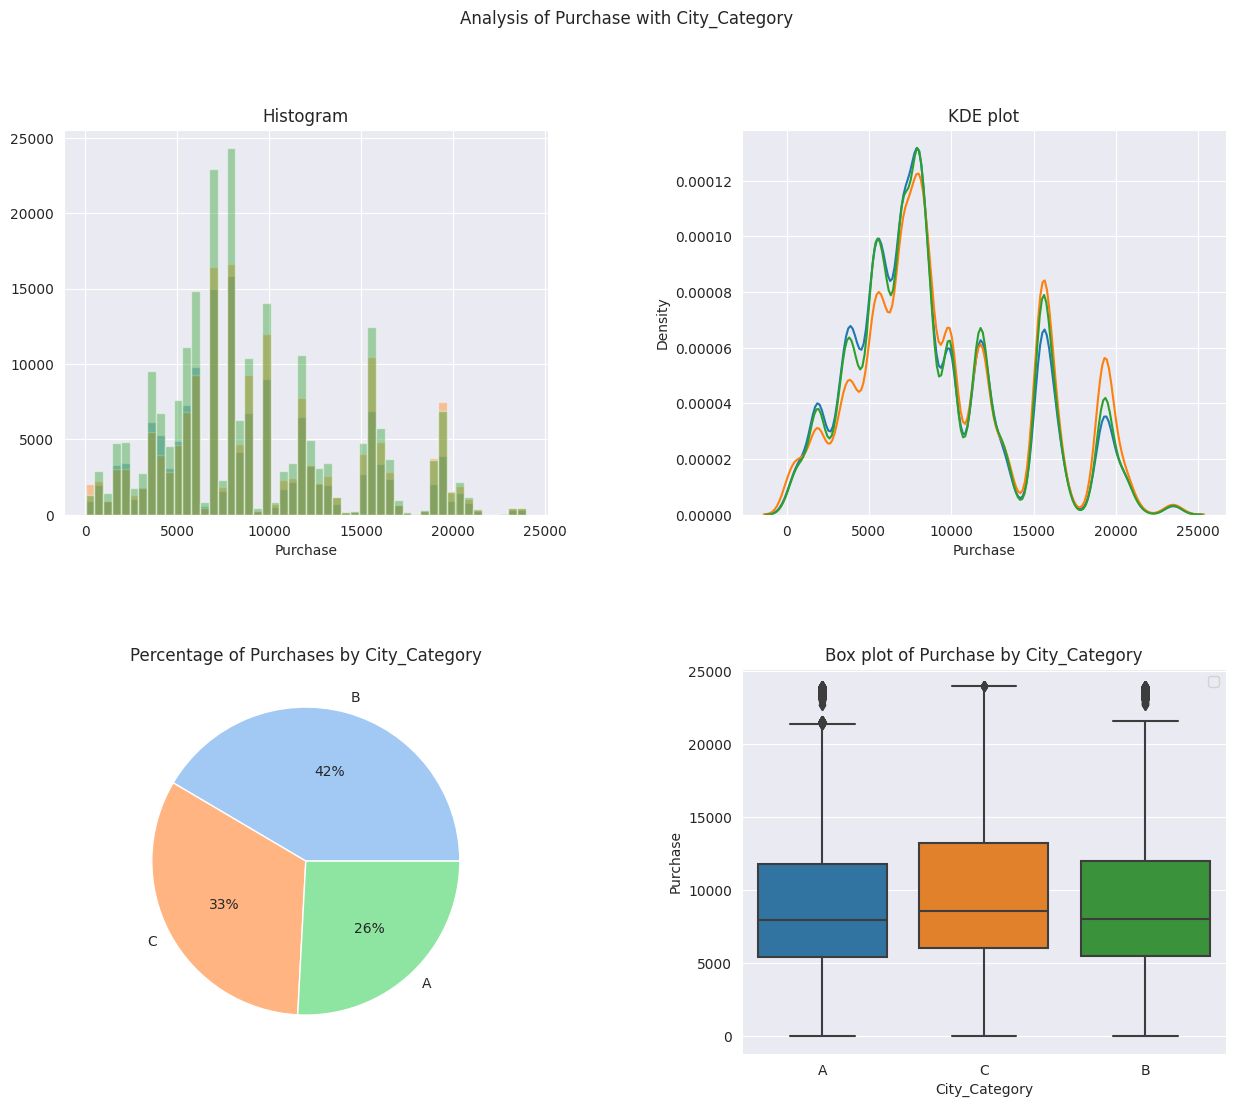

In [ ]:
Plot_1('City_Category')

---
<a name = Section4></a>
# **Convert categorical data into integer**
---

In [ ]:
df_train.Stay_In_Current_City_Years.replace({'0':0,
                                         '1':1,
                                         '2':2,
                                         '3':3,
                                         '4+':4},inplace = True)
df_train.Gender.replace({'M':1,'F':0},inplace = True)
df_train.City_Category.replace({'A':1,'B':2,'C':3},inplace = True)
df_train.Age.replace({'0-17' :17,
                  '18-25':20,
                  '26-35':30,
                  '36-45':40,
                  '46-50':47,
                  '51-55':52,
                  '55+' : 56},
                 inplace = True)

---
<a name = Section4></a>
# **Handling Missing Data**
---

In [ ]:
df_train.drop('Product_Category_3',axis = 1,inplace = True)
df_train['Product_Category_2'] =df_train['Product_Category_2'].fillna(0)

---
<a name = Section4></a>
# **Final Preprocessed Data**
---

In [ ]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,null_count
0,1000001,P00069042,0,17,10,1,2,0,3,0.0,8370,2
1,1000001,P00248942,0,17,10,1,2,0,1,6.0,15200,0
2,1000001,P00087842,0,17,10,1,2,0,12,0.0,1422,2
3,1000001,P00085442,0,17,10,1,2,0,12,14.0,1057,1
4,1000002,P00285442,1,56,16,3,4,0,8,0.0,7969,2


In [ ]:
df_train.head().tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,null_count
0,1000001,P00069042,0,17,10,1,2,0,3,0.0,8370,2
1,1000001,P00248942,0,17,10,1,2,0,1,6.0,15200,0
2,1000001,P00087842,0,17,10,1,2,0,12,0.0,1422,2
3,1000001,P00085442,0,17,10,1,2,0,12,14.0,1057,1
4,1000002,P00285442,1,56,16,3,4,0,8,0.0,7969,2


In [ ]:
df_train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
null_count                    0
dtype: int64

---
<a name = Section4></a>
# **EDA and Statistical analysis - Target column**
---

In [ ]:
describe_stats

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,median
User_ID,550068.0,NaN,NaN,NaN,1003028.842401,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0,1003077.0
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068.0,NaN,NaN,NaN,8.076707,6.52266,0.0,2.0,7.0,14.0,20.0,7.0
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068.0,NaN,NaN,NaN,0.409653,0.49177,0.0,0.0,0.0,1.0,1.0,0.0
Product_Category_1,550068.0,NaN,NaN,NaN,5.40427,3.936211,1.0,1.0,5.0,8.0,20.0,5.0
Product_Category_2,376430.0,NaN,NaN,NaN,9.842329,5.08659,2.0,5.0,9.0,15.0,18.0,9.0


Observations:


- If the mean and median are approximately equal, it suggests that the data may be symmetric. In our case, the mean of Purchace column is 9263.968713, and the median is 8047.0. Since they are not close in value, it indicates that the data is likely not symmetric.

- We can use wide range of modeling techniques that assume a symmetric and non normally distributed residual error (Eg: Tree based regression)

- It is always recommended to look at different statistical methods and different plots before making any conclusions.


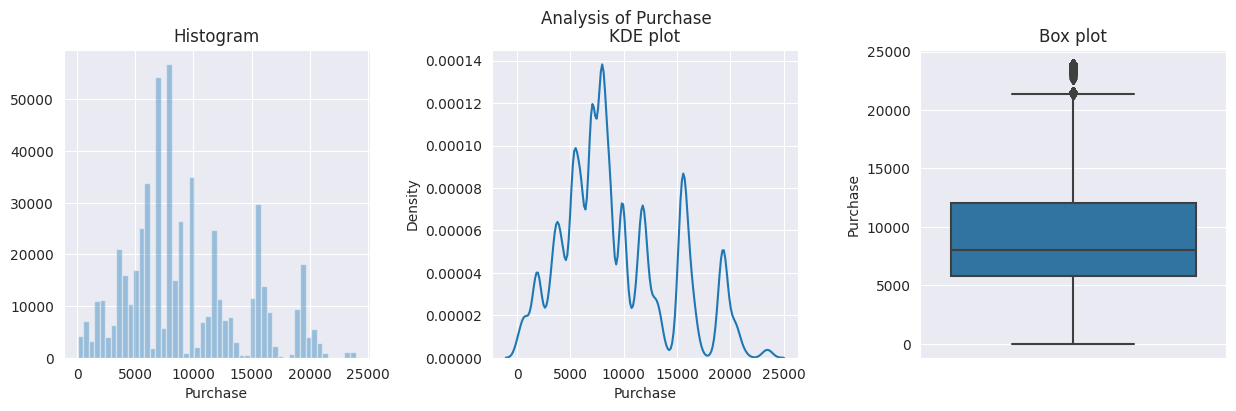

Skewness:  0.6001400037087128
Kurtosis:  -0.3383775655851702


In [ ]:
#make subplots
fig,axes = plt.subplots(1,3,figsize=(15,4))
fig.suptitle('Analysis of Purchase')
plt.subplots_adjust(wspace=0.4,hspace=0.4)
sns.set_style('darkgrid')

#histogram
sns.distplot(df_train['Purchase'],kde=False,ax = axes[0])
axes[0].set_title('Histogram')
#color='b'

#kdeplot
sns.kdeplot(data=df_train['Purchase'],ax = axes[1])
axes[1].set_title('KDE plot')

#boxplot
sns.boxplot(y=df_train['Purchase'],ax=axes[2])
axes[2].set_title('Box plot')

plt.show()

print('Skewness: ',df_train['Purchase'].skew())
print('Kurtosis: ',df_train['Purchase'].kurt())

Observations:

- Skewness is positive means that the tail of distribution is towards right as we can see in the histogram
- There are many outliers that we must remove as seen in the boxplot.

---
<a name = Section4></a>
# **Outlier Detection**
---

<Axes: xlabel='Gender', ylabel='Purchase'>

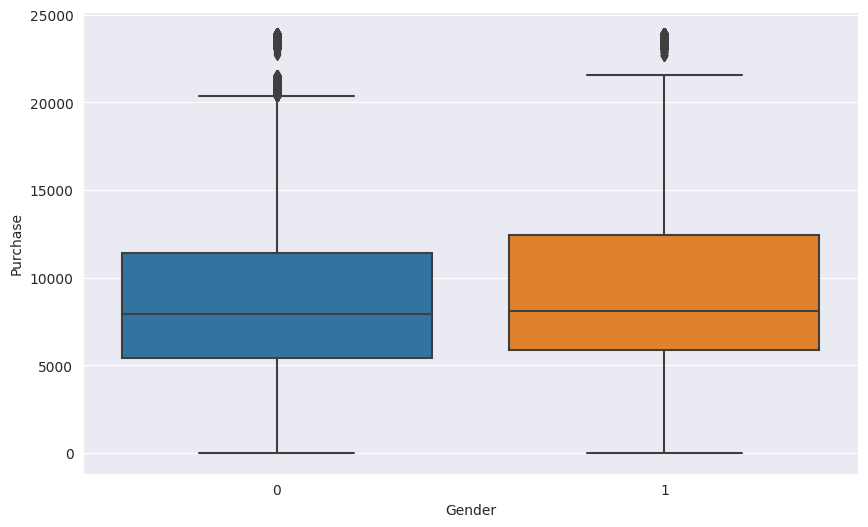

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x="Gender", y="Purchase")
## Using boxplot we can detect the presence of outliers in the data.

<Axes: xlabel='Occupation', ylabel='Purchase'>

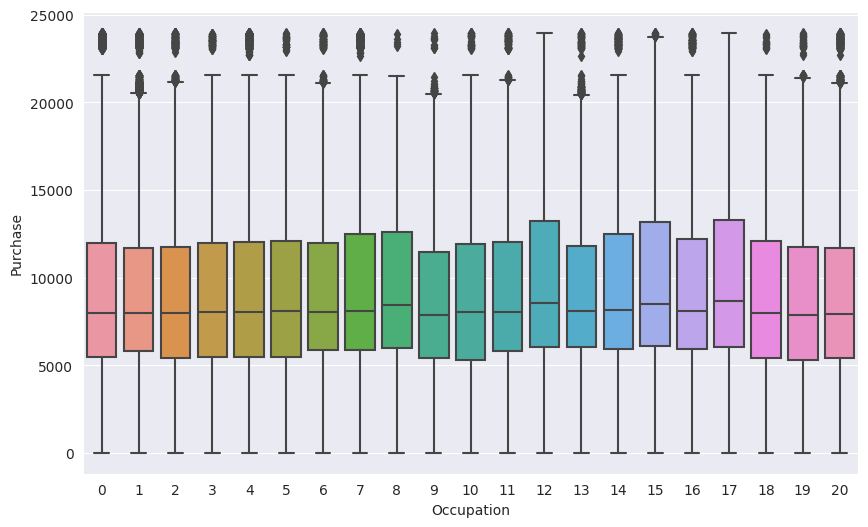

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x="Occupation", y="Purchase")
## The purchase column has outliers which may effect the performance of the machine learning models.

- As we can see above there are outliers present in the Purchase column.

<Axes: xlabel='Age', ylabel='Purchase'>

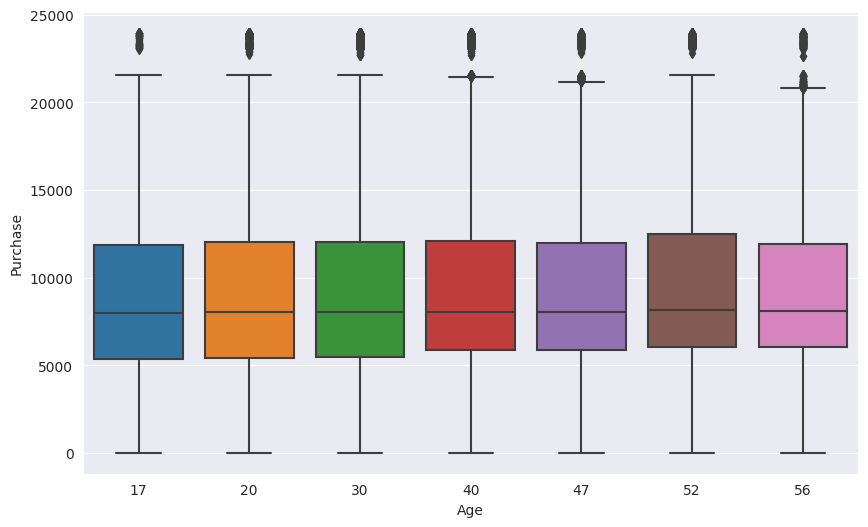

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x="Age", y="Purchase")
## We can see below that the Age with Purchases again have some outliers present in them.


<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

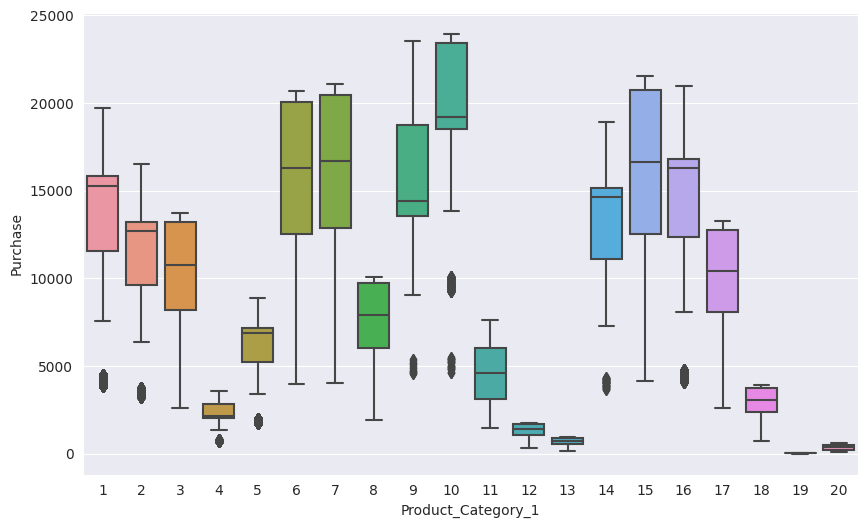

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x="Product_Category_1", y="Purchase")
## There are outliers present in the Product category as well.

---
<a name = Section4></a>
# **Correlation**
---

<Axes: >

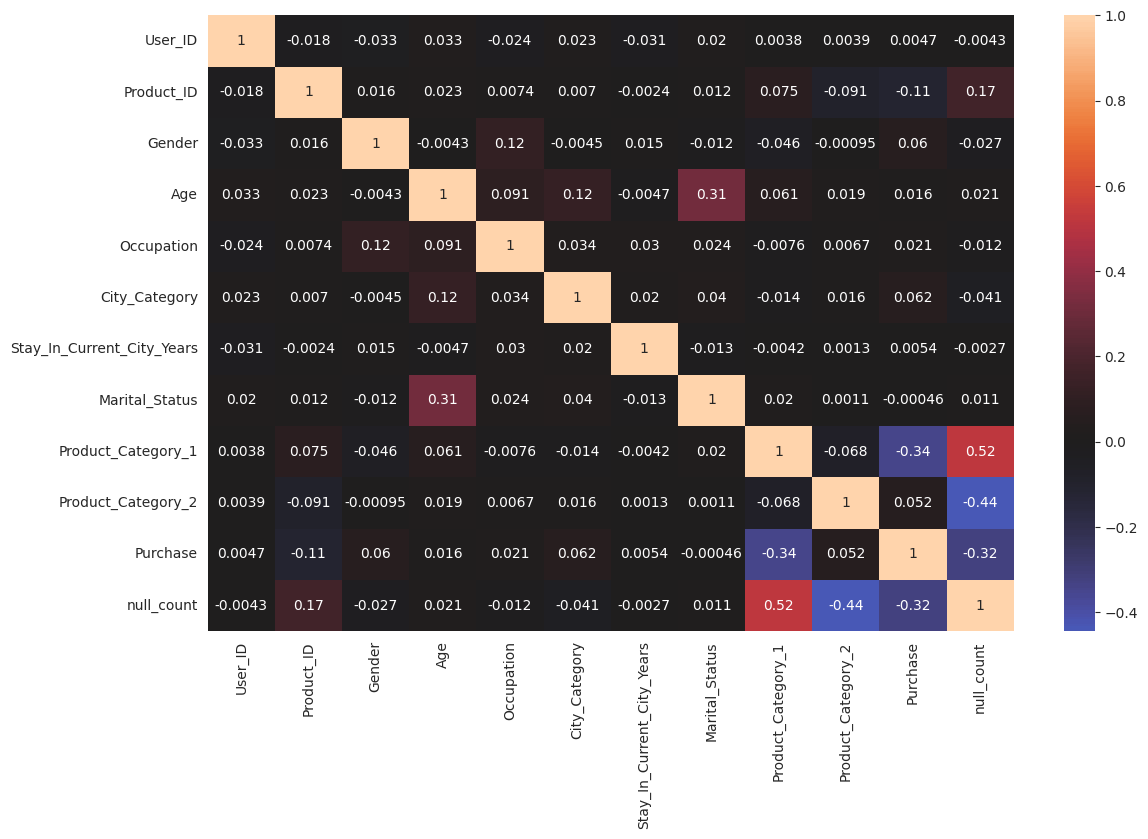

In [ ]:
#correlation
num_df = df_train.copy()

col = ['Product_ID','Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
for i in col:
    num_df[i] = num_df[i].astype('category').cat.codes


corr = num_df.corr(method='pearson')

plt.figure(figsize=(13,8))
sns.heatmap(corr, annot=True,center=0)

- Marital_Status and Age are highly correlated
- Marital Status,User_ID and StayIn Current_City_Years are highly uncorrelated with Purchase,maybe we could remove these features
- Product_ID and Purchase are coorelated!

---
<a name = Section4></a>
# **Model Building and Comparison**
---

In [ ]:
X = df_train.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = df_train['Purchase']

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y,
random_state=42, test_size=0.25)
    model.fit(x_train, y_train)

    # predict the results
    pred = model.predict(x_test)

    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))

    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))

Results
MSE: 4609.654702795242
CV Score: 4619.235059299508


<Axes: title={'center': 'Model Coefficients'}>

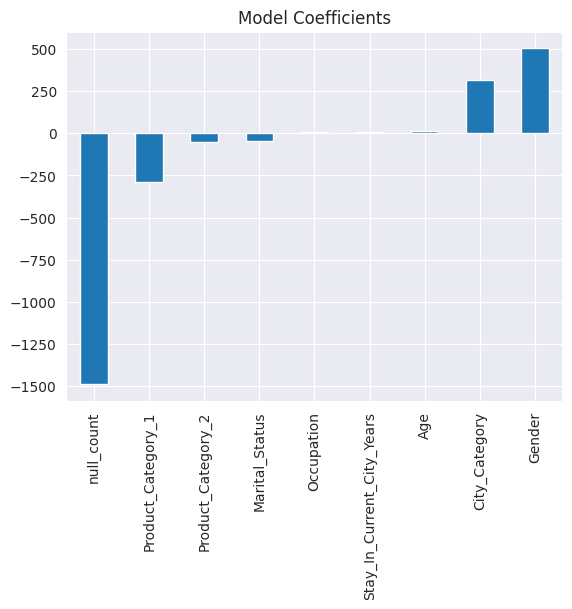

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Results
MSE: 3248.4695694769225
CV Score: 3223.2104017025235


<Axes: title={'center': 'Feature Importance'}>

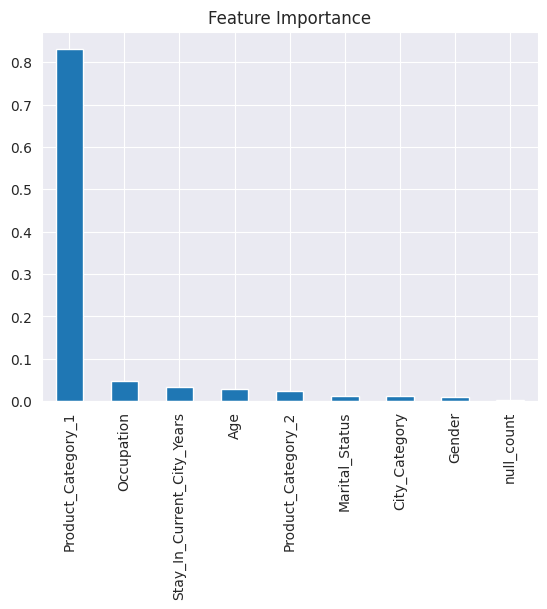

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')


---
<a name = Section4></a>
# **Conclusion**
---

It is concluded that a decision tree model is expected to perform well compared to linear regression. This conclusion is based on the fact that the data exhibits non-linearity and non-symmetry. As decision trees are capable of capturing non-linear relationships and handling asymmetric distributions, they are more suitable for such data.

However, it is important to note that the conclusion assumes no additional preprocessing has been performed on the data. Further preprocessing steps may be undertaken to enhance the performance of both models. By applying appropriate data transformations, handling outliers, or feature engineering, the accuracy of both models can be improved, with the decision tree model still expected to have a slight advantage over linear regression due to its inherent ability to handle non-linear and non-symmetric data.